<h1 style=text-align:center><b>Klasifikasi Tipe Obat(drug) Yang terdapat Pada Tubuh Pasien</h1>

<h2><b>1. BUSINESS UNDERSTANDING</h2>

1.1 <b>Menentukan masalah</b><br>
Masalah pada kasus ini ialah Membuat suatu sistem yang dapat mengklasifikasikan tipe drug/obat pada tubuh pasien.<br>

1.2 <b>Menentukan Tugas analytics</b><br>
Tugas analytics yang cocok untuk kasus ini ialah klasifikasi, dimana akan dimasukan input berupa nilai dari fitur-fitur yang berkorelasi dengan fitur tipe drug, yang nantinya model akan menklasifikasi berdasarkan fitur tersebut jenis obat/drug apa yang terdapat dalam tubuh pasien.<br>

1.3 <b>Menentukan Data yang diperlukan</b><br>
Data yang diperlukan merupakan data pasien berupa usia, jenis kelamin, level tekanan darah, tingkat kolestrol dalam darah, Sodium to potassium Ration, dan tentu juga label berupa jenis drug. Dataset berbentuk csv.


<h1><b>2.DATA UNDERSTANDING</h1>

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.shape

(200, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

<b>Keterangan kolom</b>  <br>
1). Age     : Usia Pasien<br>
2). Sex     : Jenis Kelamin Pasien<br>
3). BP      : Blood Pressure level yang terdiri dari ['HIGH', 'LOW', 'NORMAL']<br>
4). Cholesterol : level cholesterol yang terdiri dari ['HIGH', 'NORMAL']<br>
5). Na_to_K : perbandingan antara kadar natrium (sodium) dan kadar kalium (potassium) di dalam darah.<br>
6). Tipe drug/obat


<b><h3>2.1 Data Understanding Pada Kolom yang Memiliki Tipe Data Numerik</h3></b>

In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<h5><b>2.1.1 MENGECEK OUTLIER</b></h5>

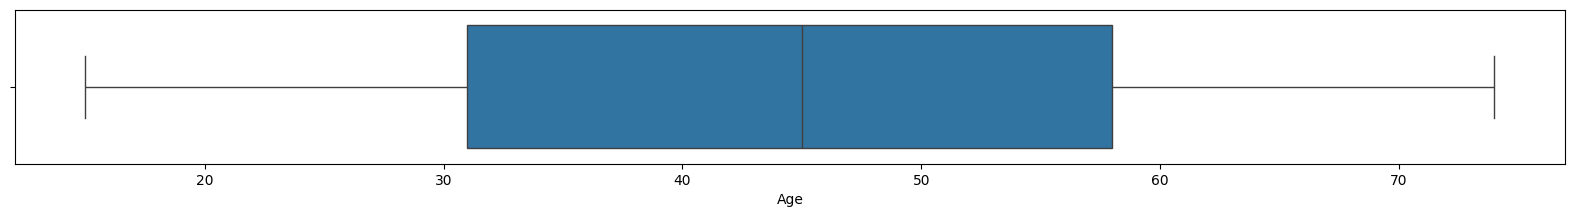

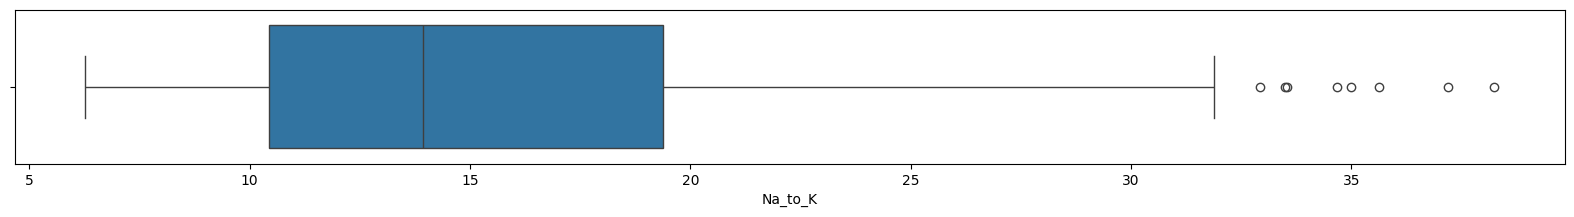

In [11]:
df_outlier = df.select_dtypes(exclude=object)
for column in df_outlier.columns:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)


Dapat dilihat bahwa pada kolom Na_to_k memiliki outlier, mari kita analisis kenapa ada outlier dengan metode tukey fence.

In [17]:
q1 = df_outlier['Na_to_K'].quantile(0.25)
q3 = df_outlier['Na_to_K'].quantile(0.75)
iqr = q3-q1
iqr

8.9345

In [86]:
percentage_out = df_outlier['Na_to_K'][(df_outlier['Na_to_K'] < q1 - 1.5 * iqr) | (df_outlier['Na_to_K'] > q3 + 1.5 * iqr) ] 
print(percentage_out)
print((np.shape(percentage_out)[0] / np.shape(df_outlier)[0])*100, '%')

24     33.486
96     38.247
98     35.639
128    33.542
131    32.922
184    37.188
188    34.997
194    34.686
Name: Na_to_K, dtype: float64
4.0 %


terdapat outlier pada kolom Na_to_K sejumlah 4 % dari data

<b><h5>2.1.3 Melihat Distribusi Normal Masing-masing kolom</h5></b>

C:\Users\Dell\AppData\Local\Temp\ipykernel_23392\2579059597.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\Dell\AppData\Local\Temp\ipykernel_23392\2579059597.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])


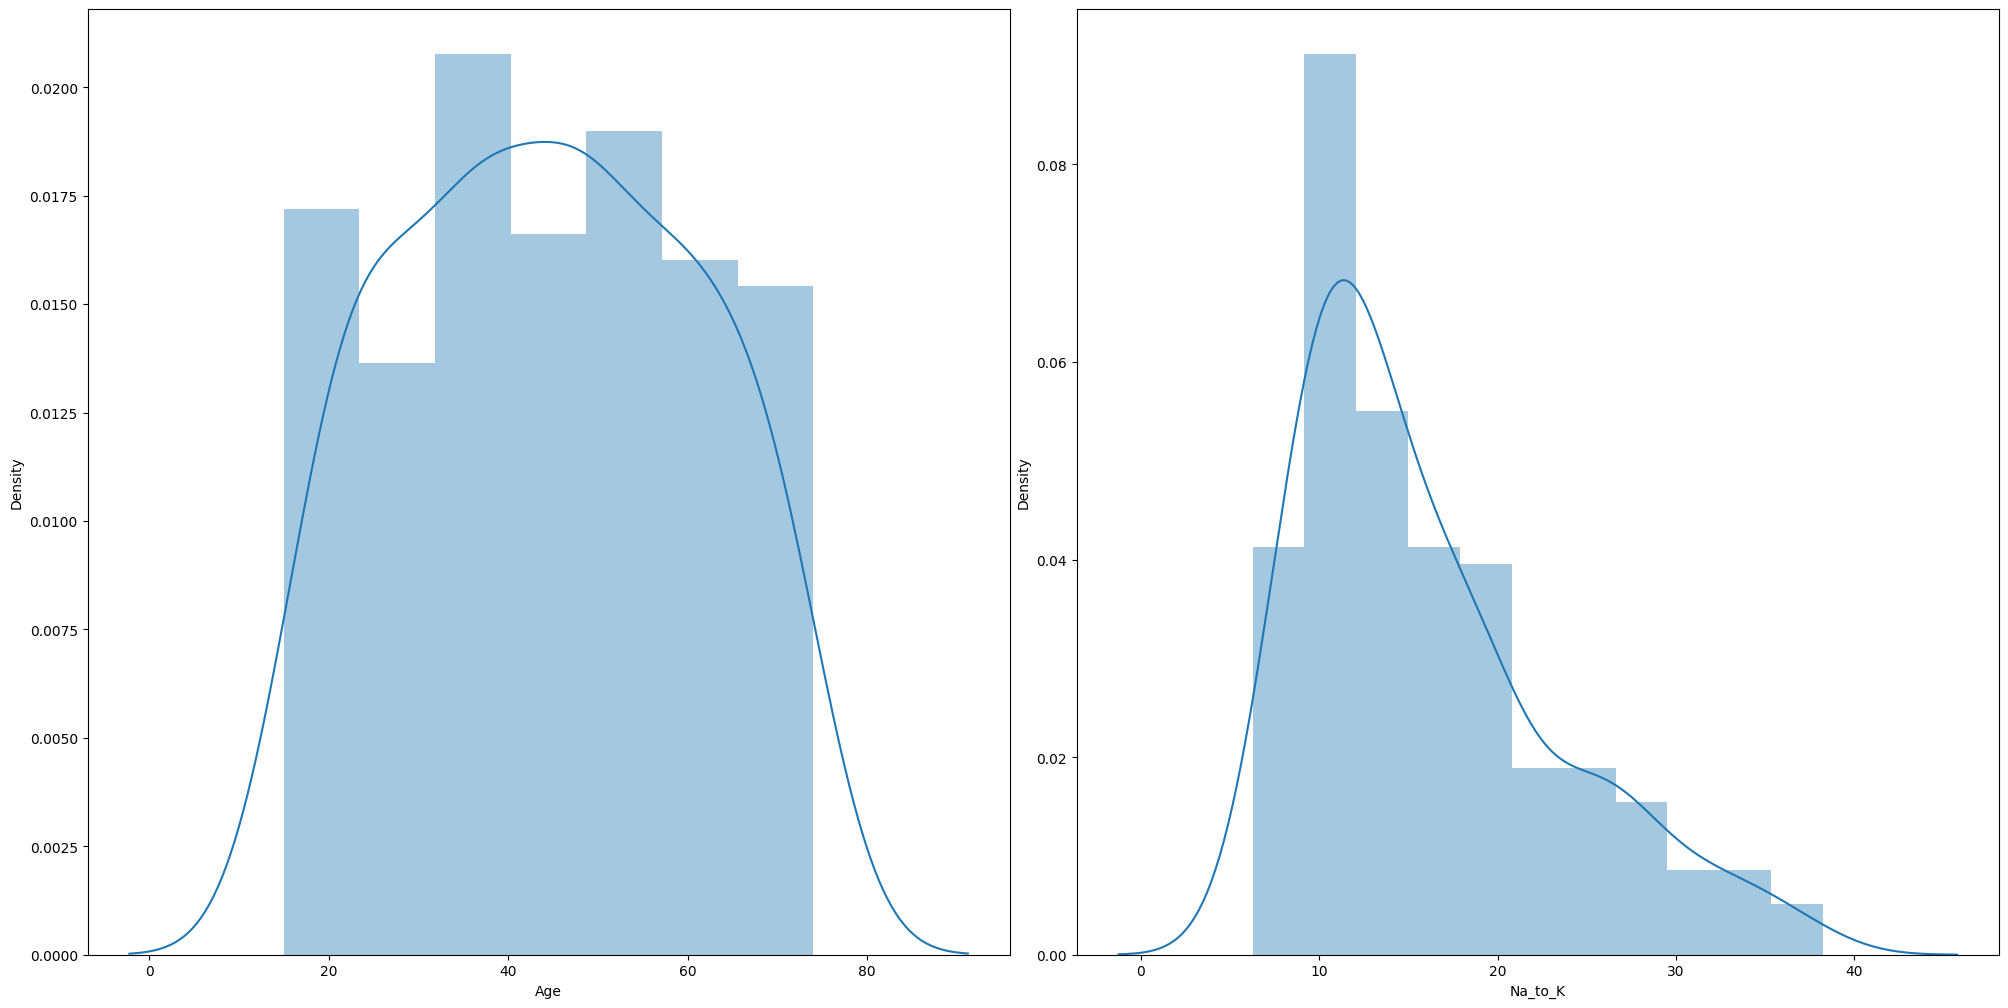

In [32]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_outlier.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

dapat dilihat bahwa: <br>
1). Pada kolom age memiliki distribusi data yang sangat normal<br>
2). Sedangkan pada kolom Na_to_K memiliki distribusi data yang sedikit condong ke kiri satau memiliki skewness positif dikarenakan ada naya outlier dengan nilai yang sangat tinggi sehingga menggeser rata-rata ke kanan

<b><h3>2.2 Data Understanding Pada Kolom yang Memiliki Tipe Data Object</h3></b>

In [34]:
df_object = df.select_dtypes(include=object)
df_object

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,DrugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,DrugY
...,...,...,...,...
195,F,LOW,HIGH,drugC
196,M,LOW,HIGH,drugC
197,M,NORMAL,HIGH,drugX
198,M,NORMAL,NORMAL,drugX


In [37]:
df_object.shape

(200, 4)

In [38]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sex          200 non-null    object
 1   BP           200 non-null    object
 2   Cholesterol  200 non-null    object
 3   Drug         200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


<h5><b>2.2.1 Melihat nilai unique masing-masning kolom

In [41]:
for kolom in df_object.columns :
    print('Nilai Unil untuk kolom ',kolom, ' adalah ', df_object[kolom].unique())

Nilai Unil untuk kolom  Sex  adalah  ['F' 'M']
Nilai Unil untuk kolom  BP  adalah  ['HIGH' 'LOW' 'NORMAL']
Nilai Unil untuk kolom  Cholesterol  adalah  ['HIGH' 'NORMAL']
Nilai Unil untuk kolom  Drug  adalah  ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


<h5><b>2.2.2 Analisa delay masing-masing kolom dengan Groupby dan visualisasi</h5>

<b>A. Analisa Kolom Sex 

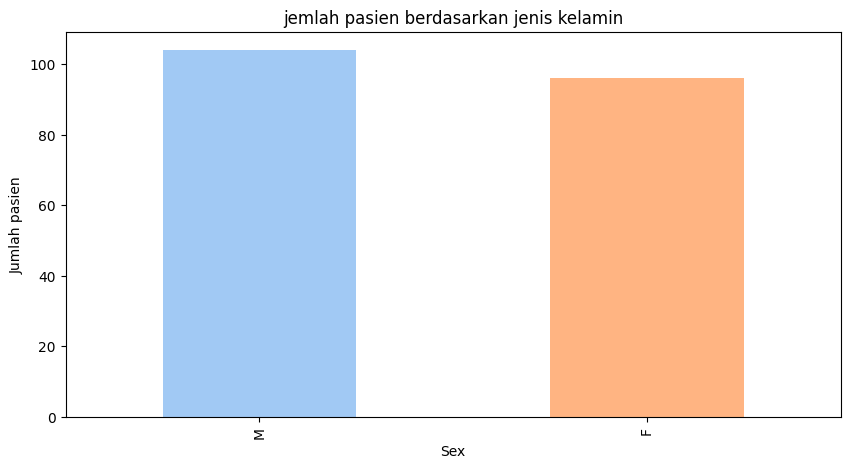

In [47]:
plt.figure(figsize=(10,5))
myColors = sns.color_palette('pastel')[0:5]
df_object['Sex'].value_counts().plot(kind='bar',color= myColors)
plt.ylabel('Jumlah pasien')
plt.title('jemlah pasien berdasarkan jenis kelamin')
plt.show()

jumlah pasien dengan jenis kelamin M(Male) dan F(Female) cukup seimbang

<b>B. Analisa Kolom BP


In [48]:
df_object['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

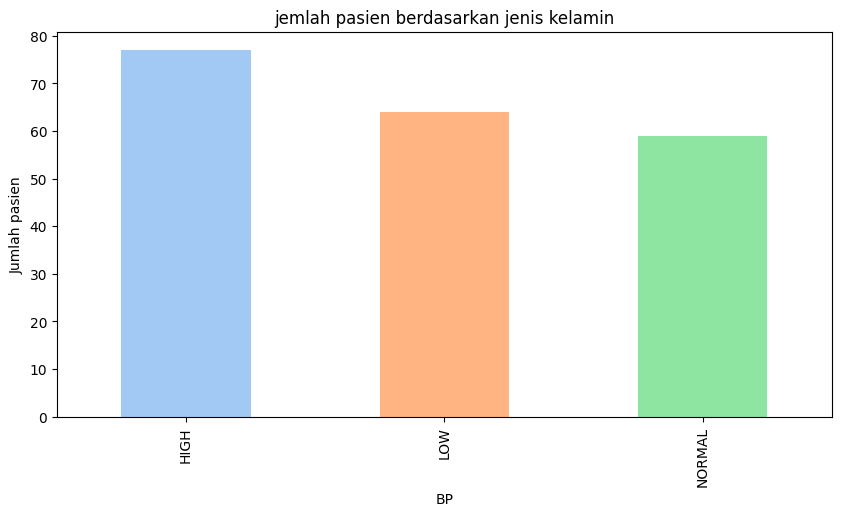

In [49]:
plt.figure(figsize=(10,5))
myColors = sns.color_palette('pastel')[0:5]
df_object['BP'].value_counts().plot(kind='bar',color= myColors)
plt.ylabel('Jumlah pasien')
plt.title('jemlah pasien berdasarkan jenis kelamin')
plt.show()

<b>C. Analisa Kolom Cholesterol


In [50]:
df_object['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

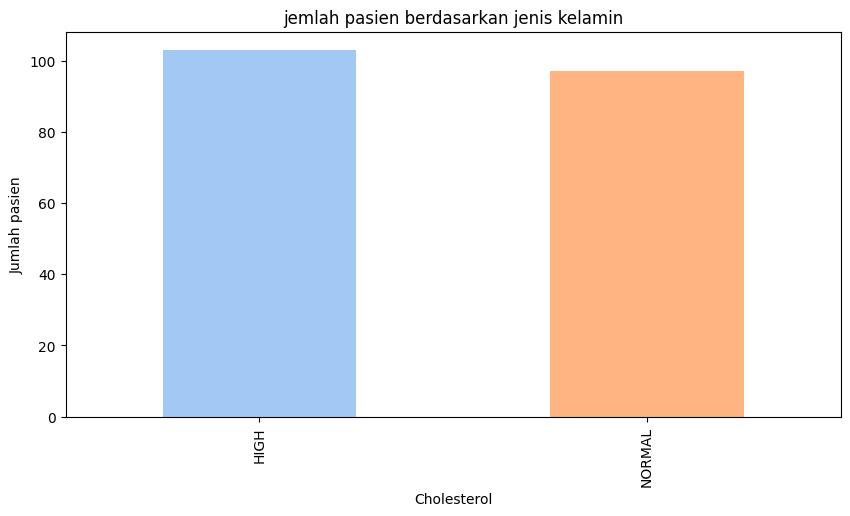

In [51]:
plt.figure(figsize=(10,5))
myColors = sns.color_palette('pastel')[0:5]
df_object['Cholesterol'].value_counts().plot(kind='bar',color= myColors)
plt.ylabel('Jumlah pasien')
plt.title('jemlah pasien berdasarkan jenis kelamin')
plt.show()

<b>D. Analisa Kolom Drug

In [53]:
df_object['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

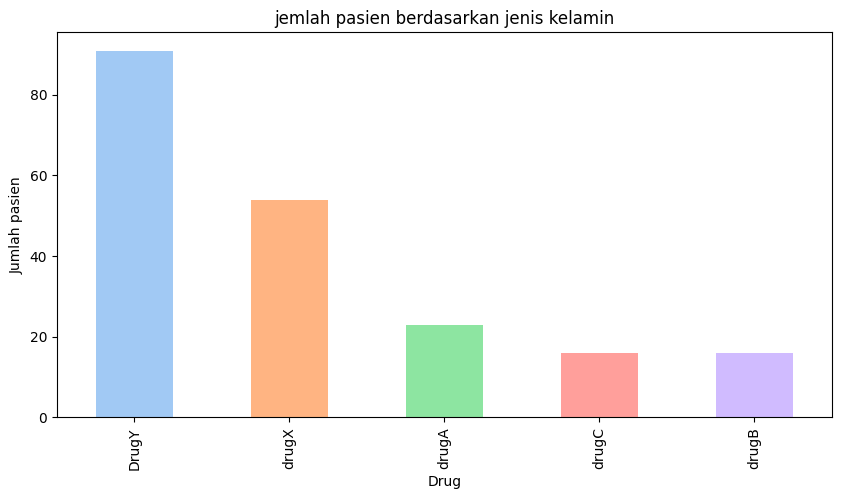

In [52]:
plt.figure(figsize=(10,5))
myColors = sns.color_palette('pastel')[0:5]
df_object['Drug'].value_counts().plot(kind='bar',color= myColors)
plt.ylabel('Jumlah pasien')
plt.title('jemlah pasien berdasarkan jenis kelamin')
plt.show()

<b>Kesimpulan:</b><br>
1). Pada kolom sex, kolesterol, dan blood pressure memiliki perbandingan antara category yang cukup seimbang<br>
2). Pada kolom drug memiliki perbandingan antara kategory yang tidak seimbang dimana kategory dengan frekuensi paling besar yaitu drugY dengan jumlah 91 sedangan yang paling rendah drugC dan drugB dengan frekuensi 16</b>

<b>Solusi : </b><br>
1). Menggabungkan kategory drugX, drugA, drugC, dan drugB sehingga dalam kolom drug hanyat terdapat 2 kategory yaitu DrugY dan other Drug.<br>
2). Pada saat pemodelan, emnggunakan model yang tahan dengan data tidak seimbang atau melakukan tuning parameter.<br>

<h1><b>3. DATA PREPARATION</b></h1>

In [466]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


<h5><b>3.1 Mengganti nama kolom</h5>

In [491]:
df_select = df.rename(columns=
                      {"Age":"Usia"
                        ,"Sex":"Jenis Kelamin"
                        ,"BP":"Level Tekanan Darah"
                        ,"Cholesterol":"Level Kolesterol"
                        , "Na_to_K":"Rasio Natrium terhadap Kalium"})

In [492]:
df_select

,Usia,Jenis Kelamin,Level Tekanan Darah,Level Kolesterol,Rasio Natrium terhadap Kalium,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


<h5><b>3.2 Menghitung nilai data yang kosong</h5>

In [493]:
df_select.isna().sum()

Usia                             0
Jenis Kelamin                    0
Level Tekanan Darah              0
Level Kolesterol                 0
Rasio Natrium terhadap Kalium    0
Drug                             0
dtype: int64

<b><h5>3.3 Handling Oulier Pada Data Numerik</h5>

<b>3.3.1 Mengecek Outlier

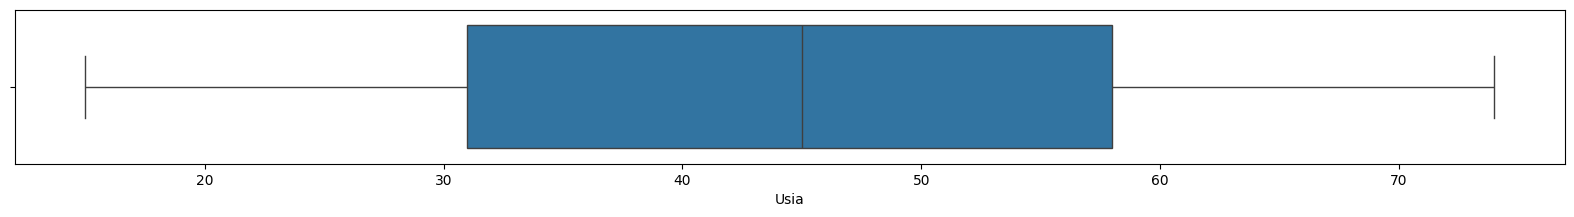

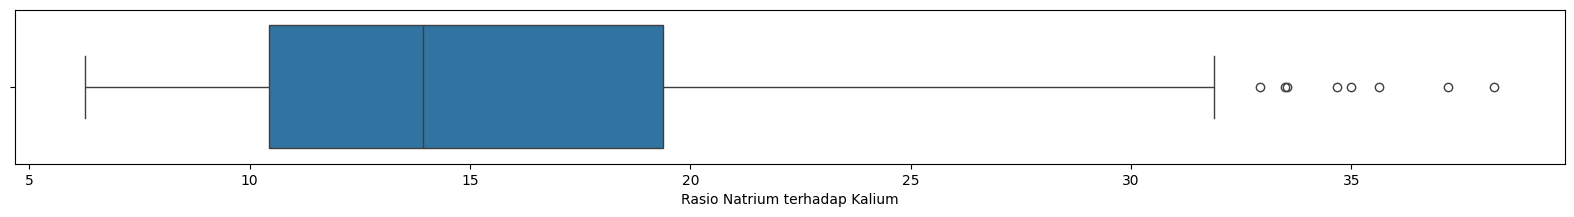

In [494]:
for column in df_select.select_dtypes(exclude=object):
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_select.select_dtypes(exclude=object), x=column)

<b>3.3.2 Handling Outlier pada kolom Rasio Natrium terhadap Kalium

karena outlier pada kolom rasio natrim terhadap kalium menurut saya merupakan data yang memang memiliki outlier secara alami maka akan lebih cocok jika dilakukan winsorizing pada data outlier.

In [495]:
df_select.columns

Index(['Usia', 'Jenis Kelamin', 'Level Tekanan Darah', 'Level Kolesterol',
       'Rasio Natrium terhadap Kalium', 'Drug'],
      dtype='object')

In [496]:
from scipy.stats.mstats import winsorize

In [497]:
q1 = df_select['Rasio Natrium terhadap Kalium'].quantile(0.25)
q3 = df_select['Rasio Natrium terhadap Kalium'].quantile(0.75)
iqr = q3 - q1
print('quantile 1 dari kolom Rasio Natrium terhadap Kalium ialah ', q1)
print('quatile 3 dari kolom Rasio Natrium terhadap Kalium ialah ', q3)
print('iqr ialah ', iqr)

quantile 1 dari kolom Rasio Natrium terhadap Kalium ialah  10.4455
quatile 3 dari kolom Rasio Natrium terhadap Kalium ialah  19.38
iqr ialah  8.9345


In [498]:
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas bawah ',batas_bawah,' batas atas ', batas_atas)


batas bawah  -2.9562500000000007  batas atas  32.78175


In [499]:
p96 = np.percentile(df_select['Rasio Natrium terhadap Kalium'],96)
p96

31.91783999999999

kenapa pilih persentile 96, karena nilai terendah dari data outlier ialah 32 sehingga nilai yang akan diubah menjadi batas atas dengan teknik winsorizing ialah nilai 32 ke atas 

In [503]:
df_select['Rasio Natrium terhadap Kalium'] = winsorize(df_select['Rasio Natrium terhadap Kalium'], limits=[0, 0.04])

<Axes: xlabel='Rasio Natrium terhadap Kalium'>

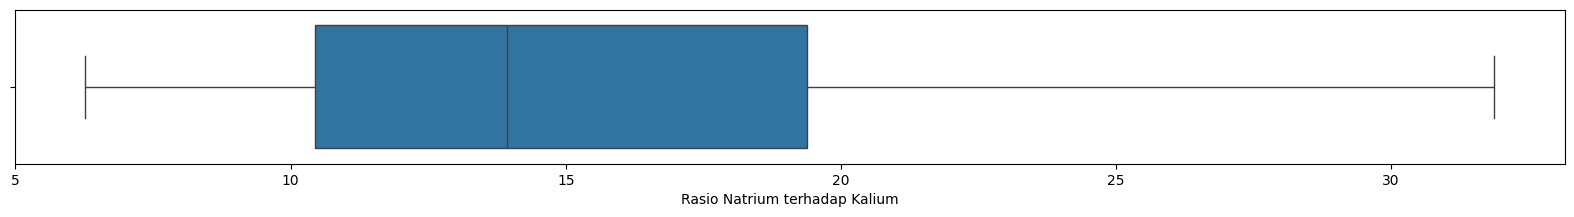

In [502]:
# Melihat outliers pada kolom length dengan menggunakan Boxplot
plt.figure(figsize=(20,2))
sns.boxplot(data=df_select, x=df_select['Rasio Natrium terhadap Kalium'])

nilai outlier sudah hilang

C:\Users\Dell\AppData\Local\Temp\ipykernel_23392\1941718032.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\Dell\AppData\Local\Temp\ipykernel_23392\1941718032.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])


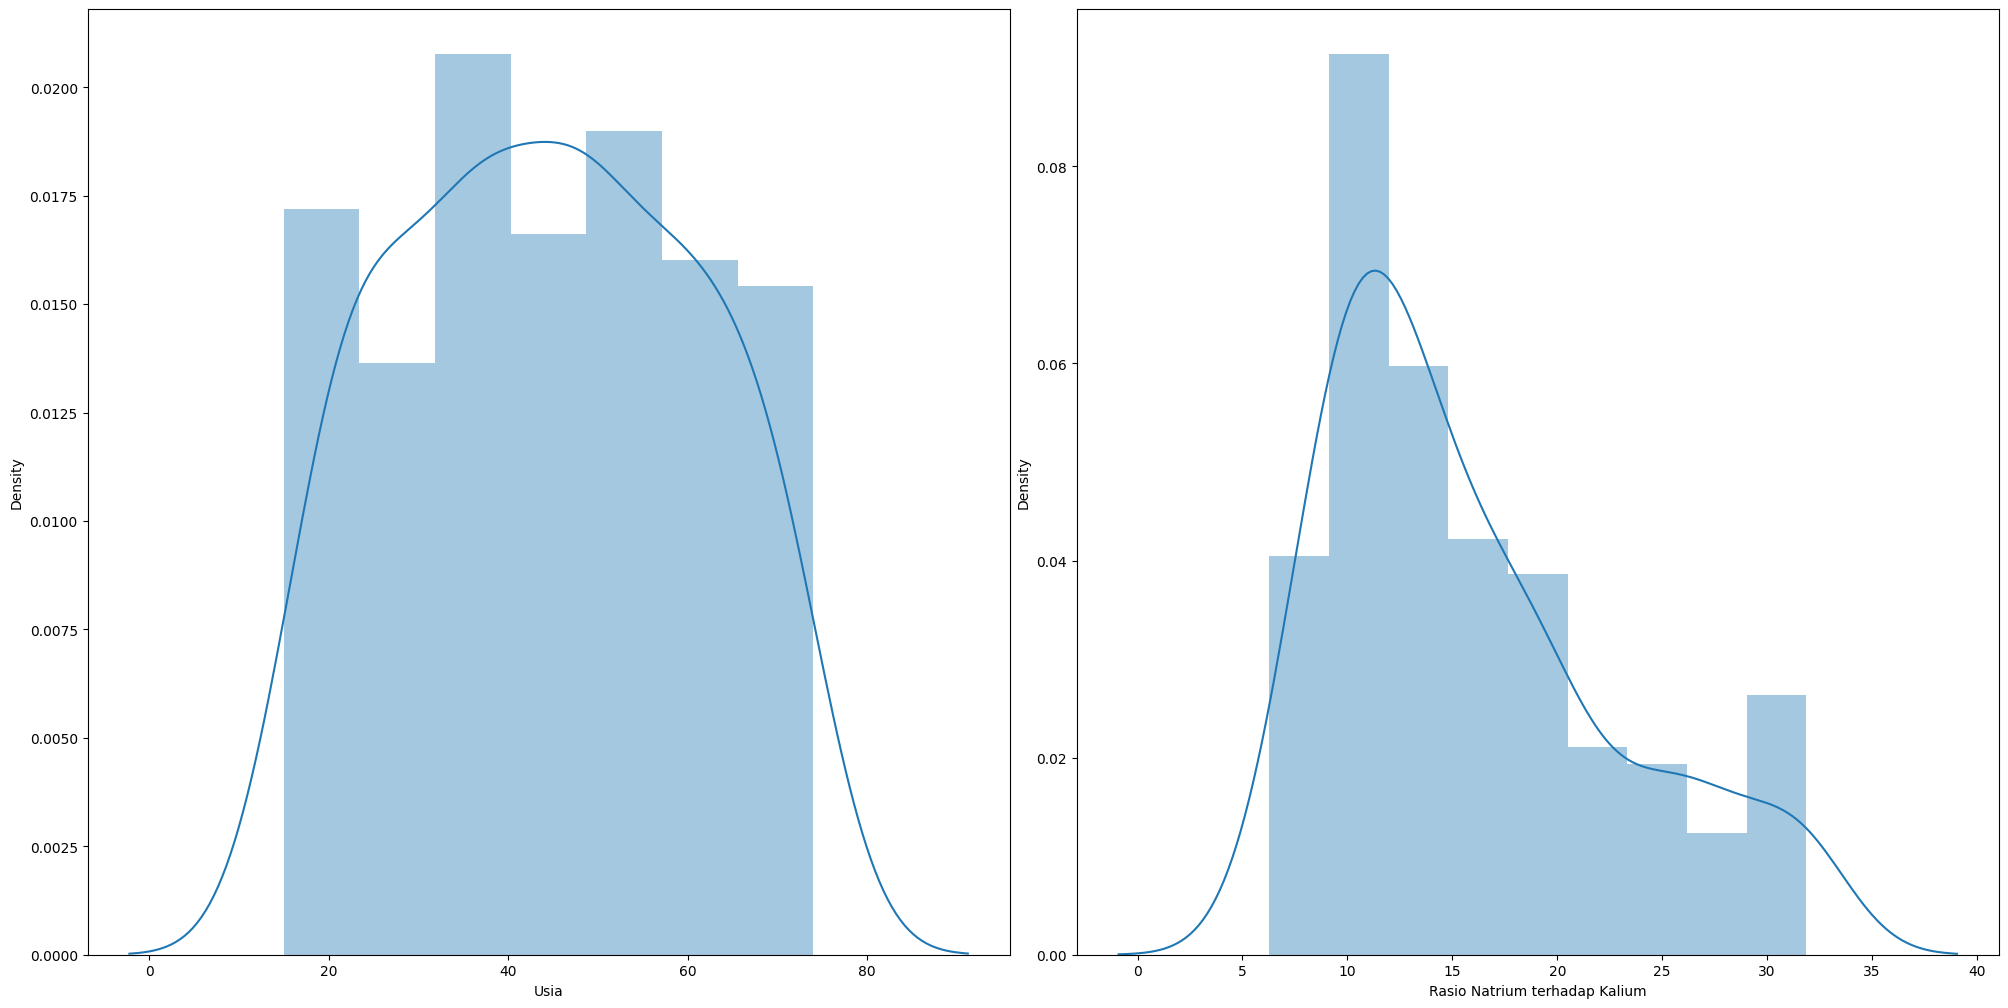

In [504]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_select.select_dtypes(exclude=object).items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [505]:
df_select.describe()

c:\Users\Dell\anaconda3\envs\tensorflowgpu\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,Usia,Rasio Natrium terhadap Kalium
count,200.000000,200.000000
mean,44.315000,15.955990
std,16.544315,6.895815
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,31.876000


<b><h5>3.4 Scalling/pensklaan</h5>

dapat dilihat bahwa pada data waktu Usia , kurva distribusi menunjukkan bahwa data berdistribusi 'cukup normal', sedangkan pada data Rasio Natrium terhadap Kalium, kurva distribusi menunjukkan bahwa data sedikit condong ke kiri namun tidak separah itu

sehingga scaling yang digunakan menggunakan <b>standarisasi</b> karena data waktu memiliki distribusi normal atau jika algoritma yang digunakan sensitif terhadap distribusi 


<b>3.4.1 Scalling dengan Standarisasi</b>

In [508]:
from sklearn.preprocessing import StandardScaler
scalers = StandardScaler()
df_select[['Rasio Natrium terhadap Kalium']] =scalers.fit_transform(df_select[['Rasio Natrium terhadap Kalium']])

In [510]:
joblib.dump(scalers, 'standard_scalers.pkl')

['standard_scalers.pkl']

In [509]:
df_select

,Usia,Jenis Kelamin,Level Tekanan Darah,Level Kolesterol,Rasio Natrium terhadap Kalium,Drug
0,23,F,HIGH,HIGH,1.366422,DrugY
1,47,M,LOW,HIGH,-0.416220,drugC
2,47,M,LOW,HIGH,-0.849305,drugC
3,28,F,NORMAL,HIGH,-1.186004,drugX
4,61,F,LOW,HIGH,0.303408,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,-0.638069,drugC
196,16,M,LOW,HIGH,-0.574247,drugC
197,52,M,NORMAL,HIGH,-0.881288,drugX
198,23,M,NORMAL,NORMAL,-0.281453,drugX


<h5><b>3.5 Labelling pada data kategorikal</h5>

In [511]:
df_select.columns

Index(['Usia', 'Jenis Kelamin', 'Level Tekanan Darah', 'Level Kolesterol',
       'Rasio Natrium terhadap Kalium', 'Drug'],
      dtype='object')

pada tahap ini akan dilakukan labelling, dilakukan labelling jenis label encoding

<b>3.5.1 Labelling label encoding

In [512]:
dict_all = dict(zip([], []))

In [514]:
df_sementara = df_select.copy()
df_sementara

,Usia,Jenis Kelamin,Level Tekanan Darah,Level Kolesterol,Rasio Natrium terhadap Kalium,Drug
0,23,F,HIGH,HIGH,1.366422,DrugY
1,47,M,LOW,HIGH,-0.416220,drugC
2,47,M,LOW,HIGH,-0.849305,drugC
3,28,F,NORMAL,HIGH,-1.186004,drugX
4,61,F,LOW,HIGH,0.303408,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,-0.638069,drugC
196,16,M,LOW,HIGH,-0.574247,drugC
197,52,M,NORMAL,HIGH,-0.881288,drugX
198,23,M,NORMAL,NORMAL,-0.281453,drugX


In [456]:
kolom_labelling =['Jenis Kelamin','Level Tekanan Darah']

In [457]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for col in kolom_labelling:
    temp_keys = df_sementara[col].values
    temp_values = label_encoder.fit_transform(df_sementara[col])
    dict_temp = dict(zip(temp_keys, temp_values))
    dict_all[col] = dict_temp
    


In [458]:
joblib.dump(label_encoder, 'label-encoder.pkl')

['label-encoder.pkl']

In [459]:
for col in kolom_labelling :
    print(col,dict_all[col])

Jenis Kelamin {'F': 0, 'M': 1}
Drug {'DrugY': 0, 'drugC': 3, 'drugX': 4, 'drugA': 1, 'drugB': 2}
Level Tekanan Darah {'HIGH': 0, 'LOW': 1, 'NORMAL': 2}


In [452]:
for col in kolom_labelling:
    df_sementara.replace(dict_all[col], inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23392\1445034214.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sementara.replace(dict_all[col], inplace=True)


<h1><b>4. MODELLING</h1>

In [453]:
df_sementara

,Usia,Jenis Kelamin,Level Tekanan Darah,Level Kolesterol,Rasio Natrium terhadap Kalium,Drug
0,-1.291591,0,0,0,1.366422,0
1,0.162699,1,1,0,-0.416220,3
2,0.162699,1,1,0,-0.849305,3
3,-0.988614,0,2,0,-1.186004,4
4,1.011034,0,1,0,0.303408,0
...,...,...,...,...,...,...
195,0.708057,0,1,0,-0.638069,3
196,-1.715759,1,1,0,-0.574247,3
197,0.465676,1,2,0,-0.881288,4
198,-1.291591,1,2,2,-0.281453,4


In [382]:
df_sementara.corr(method='spearman').abs()

,Usia,Jenis Kelamin,Level Tekanan Darah,Level Kolesterol,Rasio Natrium terhadap Kalium,Drug
Usia,1.000000,0.104467,0.062835,0.068811,0.046546,0.035777
Jenis Kelamin,0.104467,1.000000,0.005529,0.008811,0.145704,0.031350
Level Tekanan Darah,0.062835,0.005529,1.000000,0.135424,0.150701,0.342183
Level Kolesterol,0.068811,0.008811,0.135424,1.000000,0.011957,0.053000
Rasio Natrium terhadap Kalium,0.046546,0.145704,0.150701,0.011957,1.000000,0.807255
Drug,0.035777,0.031350,0.342183,0.053000,0.807255,1.000000


<Axes: >

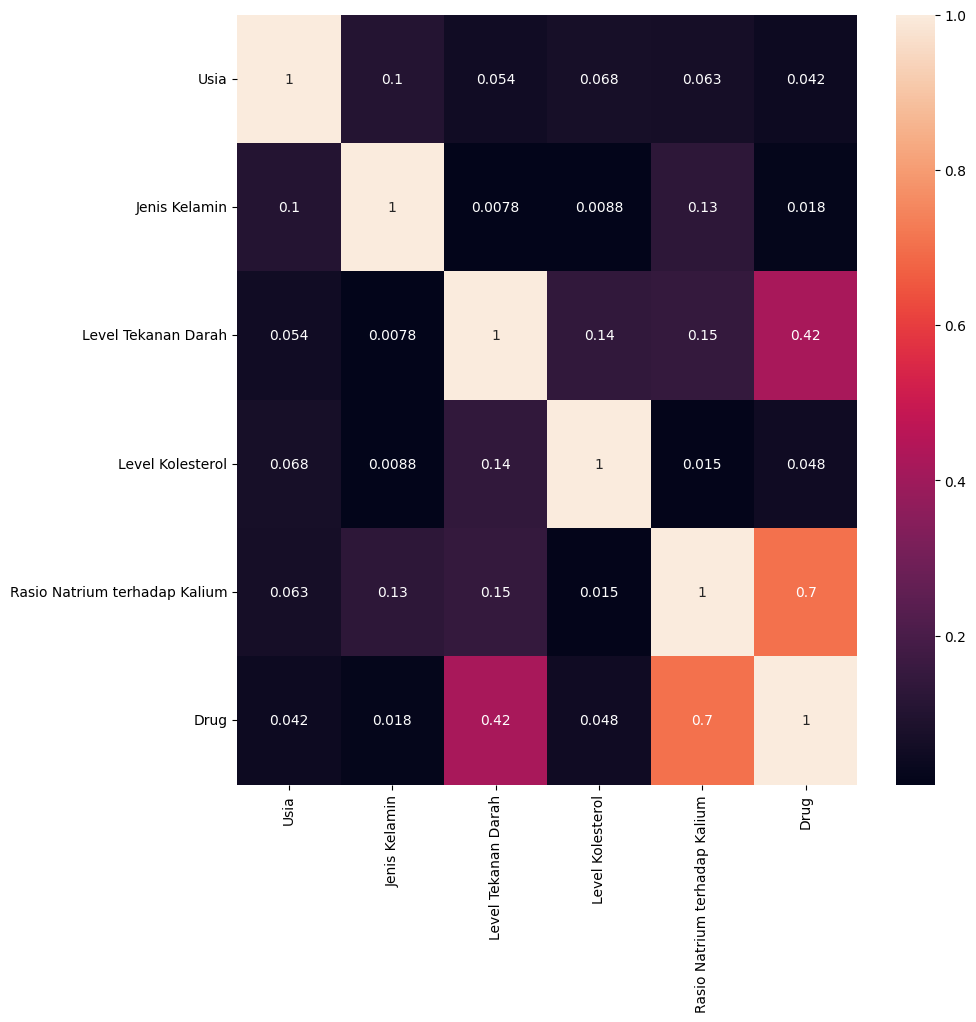

In [183]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_sementara.corr(method='pearson').abs(),  annot=True)

pada heatmap di atas, kolom yang memiliki korelasi yang cukup kuat dengan kolom Drug  ialah 'Level Tekanan Darah' dan 'Rasio Natrium terhadap Kalium' sehingga kolom lain dapat di hilangkan

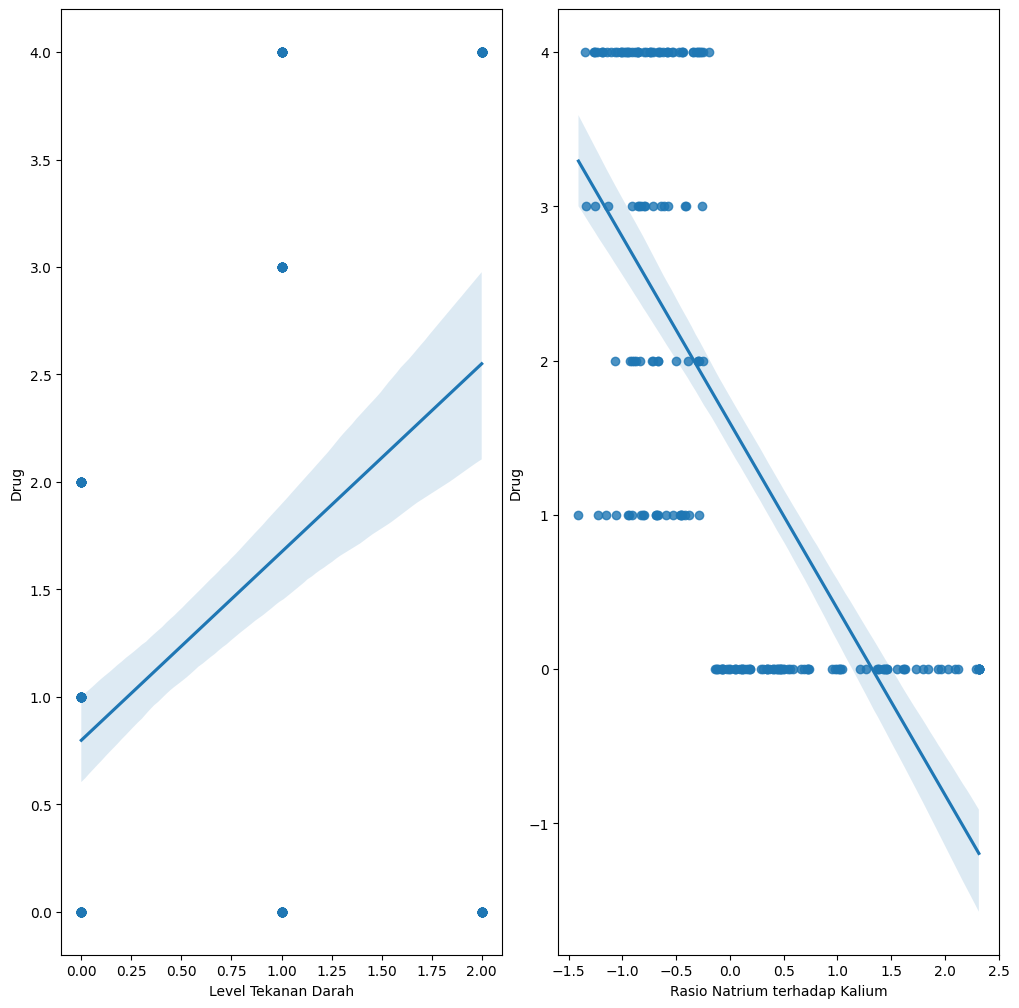

In [318]:
column_sels = ['Level Tekanan Darah','Rasio Natrium terhadap Kalium']
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=df_sementara['Drug'], x=df_sementara[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [383]:
df_sementara.columns

Index(['Usia', 'Jenis Kelamin', 'Level Tekanan Darah', 'Level Kolesterol',
       'Rasio Natrium terhadap Kalium', 'Drug'],
      dtype='object')

In [384]:
df_sementara

,Usia,Jenis Kelamin,Level Tekanan Darah,Level Kolesterol,Rasio Natrium terhadap Kalium,Drug
0,-1.291591,0,0,0,1.366422,0
1,0.162699,1,1,0,-0.416220,3
2,0.162699,1,1,0,-0.849305,3
3,-0.988614,0,2,0,-1.186004,4
4,1.011034,0,1,0,0.303408,0
...,...,...,...,...,...,...
195,0.708057,0,1,0,-0.638069,3
196,-1.715759,1,1,0,-0.574247,3
197,0.465676,1,2,0,-0.881288,4
198,-1.291591,1,2,2,-0.281453,4


In [385]:
X = df_sementara[['Level Tekanan Darah','Rasio Natrium terhadap Kalium']]

In [386]:
# y=df_akhir.loc[:,'Drug_drugA':'Drug_drugX']'
y=df_sementara['Drug']

In [389]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

<h4><b>A. LOGISTIC REGRESSION</h4>

In [390]:
from sklearn.linear_model import LogisticRegression

In [359]:
# from sklearn.multioutput import MultiOutputClassifier

In [391]:
reg = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')

In [392]:
from sklearn.metrics import accuracy_score

In [393]:
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
accuracy_log_reg = round(accuracy_score(y_test, y_pred_reg), 3)
print("Accuracy on the test set:", accuracy_log_reg )

Accuracy on the test set: 0.775


In [394]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_reg)
cnf_matrix

array([[16,  0,  1,  0,  2],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 1,  0,  0,  2,  0],
       [ 0,  0,  0,  5,  9]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

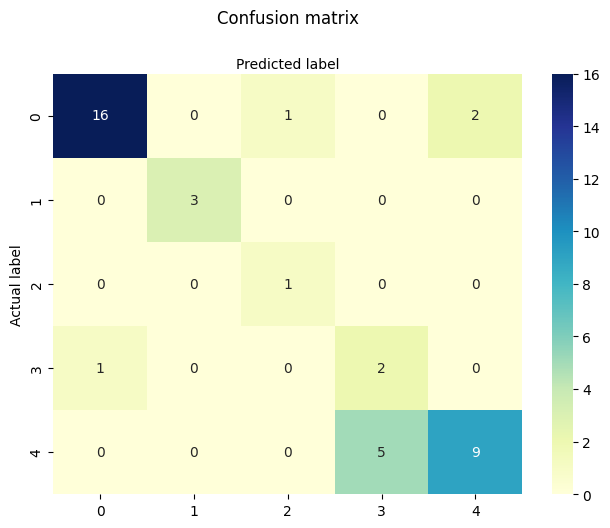

In [395]:
# Visualisasi Confusion Matrix dengan Heatmap

# Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Label kelas yang akan ditampilkan pada sumbu x dan y
fig, ax = plt.subplots() #Membuat objek gambar dan sumbu menggunakan
tick_marks = np.arange(len(class_names)) # Membuat array dengan rentang jumlah kelas yang ada

# Menentukan tanda-tanda pada sumbu x dan y sesuai dengan array yang telah dibuat
plt.xticks(tick_marks)
plt.yticks(tick_marks)

# Membuat Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix) #Parameter yang akan divisualisasi
            , annot=True # Menampilkan nilai di dalam kotak heatmap
            , cmap="YlGnBu" # Skema warna pada heatmap, "YlGnBu" adalah kombinasi antara Yellow (Kuning), Green (Hijau), dan Blue (Biru).
            ,fmt='g') #Mengatur format angka menjadi notasi umum (general notation)

# Mengatur posisi label sumbu x ke bagian atas heatmap
ax.xaxis.set_label_position("top")

# Mengatur tampilan grafik agar lebih rapi.
plt.tight_layout()

# Mengatur judul grafik, label pada sumbu y dan x
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [398]:
from sklearn.metrics import classification_report

# Mendefinisikan nama kelas dalam array
target_names = ['0','1','2','3','4']

print(classification_report(y_test # Array target yang berisi label aktual
                            , y_pred_reg # Array target yang berisi label prediksi
                            , target_names=target_names)) #Memberikan nama kelas yang akan ditampilkan

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       1.00      1.00      1.00         3
           2       0.50      1.00      0.67         1
           3       0.29      0.67      0.40         3
           4       0.82      0.64      0.72        14

    accuracy                           0.78        40
   macro avg       0.71      0.83      0.74        40
weighted avg       0.84      0.78      0.80        40



In [399]:
reg.predict([[0, -0.669761]])

c:\Users\Dell\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

<h4><b>B. SVM</b></h4>

In [440]:
from sklearn import svm

In [441]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear',class_weight='balanced') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

In [442]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.825


In [443]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
cnf_matrix

array([[17,  0,  1,  0,  1],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  5,  9]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

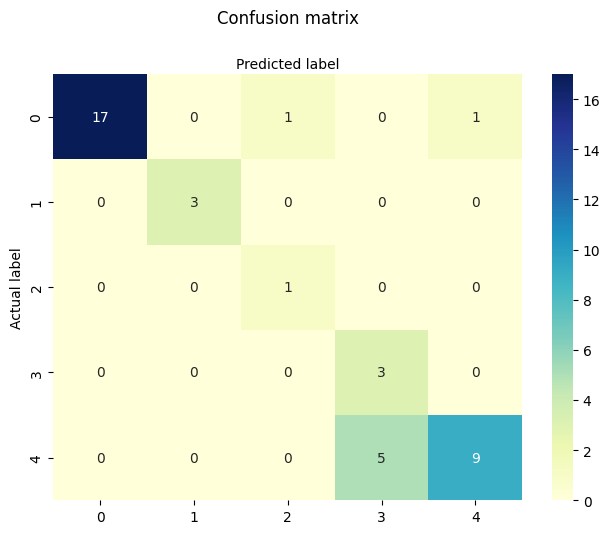

In [424]:
# Visualisasi Confusion Matrix dengan Heatmap

# Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Label kelas yang akan ditampilkan pada sumbu x dan y
fig, ax = plt.subplots() #Membuat objek gambar dan sumbu menggunakan
tick_marks = np.arange(len(class_names)) # Membuat array dengan rentang jumlah kelas yang ada

# Menentukan tanda-tanda pada sumbu x dan y sesuai dengan array yang telah dibuat
plt.xticks(tick_marks)
plt.yticks(tick_marks)

# Membuat Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix) #Parameter yang akan divisualisasi
            , annot=True # Menampilkan nilai di dalam kotak heatmap
            , cmap="YlGnBu" # Skema warna pada heatmap, "YlGnBu" adalah kombinasi antara Yellow (Kuning), Green (Hijau), dan Blue (Biru).
            ,fmt='g') #Mengatur format angka menjadi notasi umum (general notation)

# Mengatur posisi label sumbu x ke bagian atas heatmap
ax.xaxis.set_label_position("top")

# Mengatur tampilan grafik agar lebih rapi.
plt.tight_layout()

# Mengatur judul grafik, label pada sumbu y dan x
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [425]:
from sklearn.metrics import classification_report

# Mendefinisikan nama kelas dalam array
target_names = ['0','1','2','3','4']

print(classification_report(y_test # Array target yang berisi label aktual
                            , y_pred_svm # Array target yang berisi label prediksi
                            , target_names=target_names)) #Memberikan nama kelas yang akan ditampilkan

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00         3
           2       0.50      1.00      0.67         1
           3       0.38      1.00      0.55         3
           4       0.90      0.64      0.75        14

    accuracy                           0.82        40
   macro avg       0.76      0.91      0.78        40
weighted avg       0.91      0.82      0.84        40



In [430]:
clf.predict([[1, 1]])

c:\Users\Dell\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [444]:
joblib.dump(clf, 'model_SVM.pkl')

['model_SVM.pkl']

<h4><b>C. Decissiom Tree</h4>

In [410]:
from sklearn.tree import DecisionTreeClassifier

In [412]:
tree_clsfr = DecisionTreeClassifier(max_depth=3, class_weight='balanced')

In [413]:
tree_reg.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [414]:
y_pred_tree = tree_reg.predict(X_test)

In [433]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.8


In [431]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_tree)
cnf_matrix

array([[19,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  5,  9]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

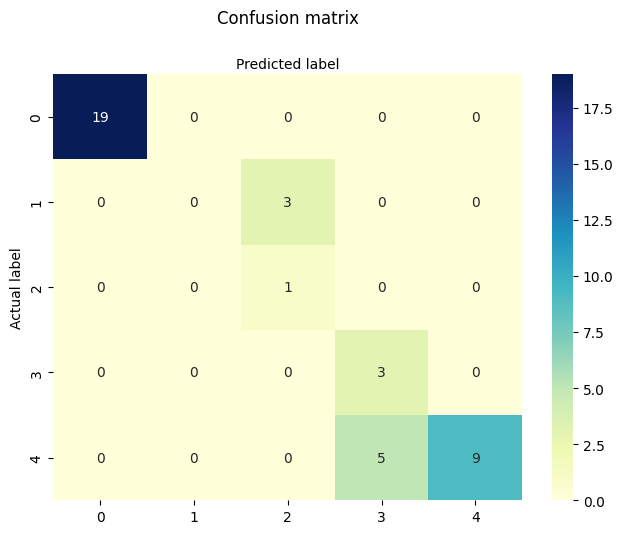

In [432]:
# Visualisasi Confusion Matrix dengan Heatmap

# Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Label kelas yang akan ditampilkan pada sumbu x dan y
fig, ax = plt.subplots() #Membuat objek gambar dan sumbu menggunakan
tick_marks = np.arange(len(class_names)) # Membuat array dengan rentang jumlah kelas yang ada

# Menentukan tanda-tanda pada sumbu x dan y sesuai dengan array yang telah dibuat
plt.xticks(tick_marks)
plt.yticks(tick_marks)

# Membuat Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix) #Parameter yang akan divisualisasi
            , annot=True # Menampilkan nilai di dalam kotak heatmap
            , cmap="YlGnBu" # Skema warna pada heatmap, "YlGnBu" adalah kombinasi antara Yellow (Kuning), Green (Hijau), dan Blue (Biru).
            ,fmt='g') #Mengatur format angka menjadi notasi umum (general notation)

# Mengatur posisi label sumbu x ke bagian atas heatmap
ax.xaxis.set_label_position("top")

# Mengatur tampilan grafik agar lebih rapi.
plt.tight_layout()

# Mengatur judul grafik, label pada sumbu y dan x
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [434]:
from sklearn.metrics import classification_report

# Mendefinisikan nama kelas dalam array
target_names = ['0','1','2','3','4']

print(classification_report(y_test # Array target yang berisi label aktual
                            , y_pred_tree # Array target yang berisi label prediksi
                            , target_names=target_names)) #Memberikan nama kelas yang akan ditampilkan

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.00      0.00      0.00         3
           2       0.25      1.00      0.40         1
           3       0.38      1.00      0.55         3
           4       1.00      0.64      0.78        14

    accuracy                           0.80        40
   macro avg       0.53      0.73      0.55        40
weighted avg       0.86      0.80      0.80        40



c:\Users\Dell\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

<h1><b>5. EVALUATION</h2>

Berrdasarkan langkan yang sudah dilakukan sebelumnya, terdapat fakta-fakta sebagai berikut : <br>
1). Data termasuk kecil yaitu hanya 200 records data saja.<br>
2). pada label data yaitu kolom drug terdapat ketidakseimbangan jumlah frekuensi antar kelas data , dimana kelas drugY dan drugX mendominasi.<br>
3). Matrix yang digunakan untuk pemilihan model ialah precission, precission digunakan karna saya ingin menunjukkan seberapa akurat model dalam mengidentifikasi jenis narkoba ketika model tersebut memberi label positif. Precission juga dipilih sebab Jika salah mengidentifikasi jenis narkoba dapat menyebabkan dampak serius, seperti perlakuan yang salah atau penanganan yang tidak tepat.<br>
4). MOdel yang dipilih ialah Logistic Regression, SVM, dan Decission tree, model tersebut dipilih untuk dibandingkan karena diketahui model-model tersebut tahan terhadap imbalanced data.<br>
5). Berdasarkan hasil pemodelan,  <b>nilai weighted avg accuracy precission terbesar ialah support vector machine(SVM) dengan nilai sebesar 0.91.</b> Kenapa memilih weighted avg accuracy sebagai pembanding? karena dataset tidak seimbang sehingga nilai weighted avg lebih diperhitungkan.